In [7]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 31.3 MB/s eta 0:00:0000:010:02
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [107]:
pip install pylatexenc

  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=16a3900bdce860c4eeb6614e03544fff693b033832539848489be2084dfcb26c
  Stored in directory: /home/jovyan/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
Note: you may need to restart the kernel to use updated packages.


In [72]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from numpy import pi

In [109]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
circuit.h(qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.cx(qreg_q[2], qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

In [81]:
"""
Instead of using execute() function to execute the simulation, you should import the transpile method from qiskit.
The execute() function is no longer available in Qiskit 1.0v
"""
from qiskit import transpile
from qiskit_aer import Aer

In [82]:
Aer.backends()
backend = Aer.get_backend('qasm_simulator')

#Alternative method to execute your simulation insteado of using deprecated execute() function.
new_circuit = transpile(circuit, backend)
job = backend.run(new_circuit)

In [83]:
count = job.result().get_counts()
print(count)

{'000': 505, '111': 519}


In [79]:
#Importing visualization methods to analyse our simulation results
from qiskit.visualization import *

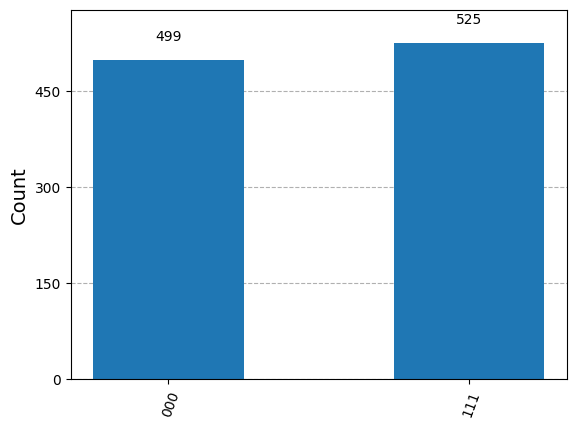

In [53]:
plot_histogram(count)

In [66]:
pip install qiskit_ibm_runtime

Note: you may need to restart the kernel to use updated packages.


In [68]:
"""
To execute your simulation on a real Quantum Computer, you'll need to use the qiskit_ibm_runtime.
The IBMQ Is now deprecated. We need to use the qiskit_ibm_runtime from Qiskit 1.0v
"""
from qiskit_ibm_runtime import QiskitRuntimeService

In [85]:
#To use the IBM Quantum Computers services, use your account and save it through your API Token.

token = "Insert Here you API Token\nQiskitRuntimeService.save_account(channel="ibm_quantum", token=token, overwrite=True, set_as_default=True)

In [99]:
#Initialize your object with your current saved account.
service = QiskitRuntimeService(channel="ibm_quantum", token=token)

In [102]:
#Here we are searching for avalible Quantum Computers to run our circuit
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_sherbrooke')>]

In [ ]:
"""
Here we select the Quantum computer using backend method. After that, we use the transpile method and we run our circuit
on a real Quantum Computer
"""
backend = service.backend("ibm_kyoto")
